In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

In [7]:
wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names
class_names = wine.target_names

In [17]:
wine_df = pd.DataFrame(X, columns=feature_names)
wine_df['Target'] = y  # Add target column for readability
print("\nFull Wine Dataset (First 10 rows):")
wine_df


Full Wine Dataset (First 10 rows):


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [9]:
model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [10]:
y_pred = model.predict(X_test)

In [11]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Classifier Accuracy on Wine Dataset: {accuracy*100:.2f}%")

Decision Tree Classifier Accuracy on Wine Dataset: 91.67%


In [12]:
result_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
print(result_df.head(10))

   Actual  Predicted
0       0          0
1       0          0
2       2          1
3       0          0
4       1          1
5       0          0
6       1          1
7       2          2
8       1          1
9       2          0


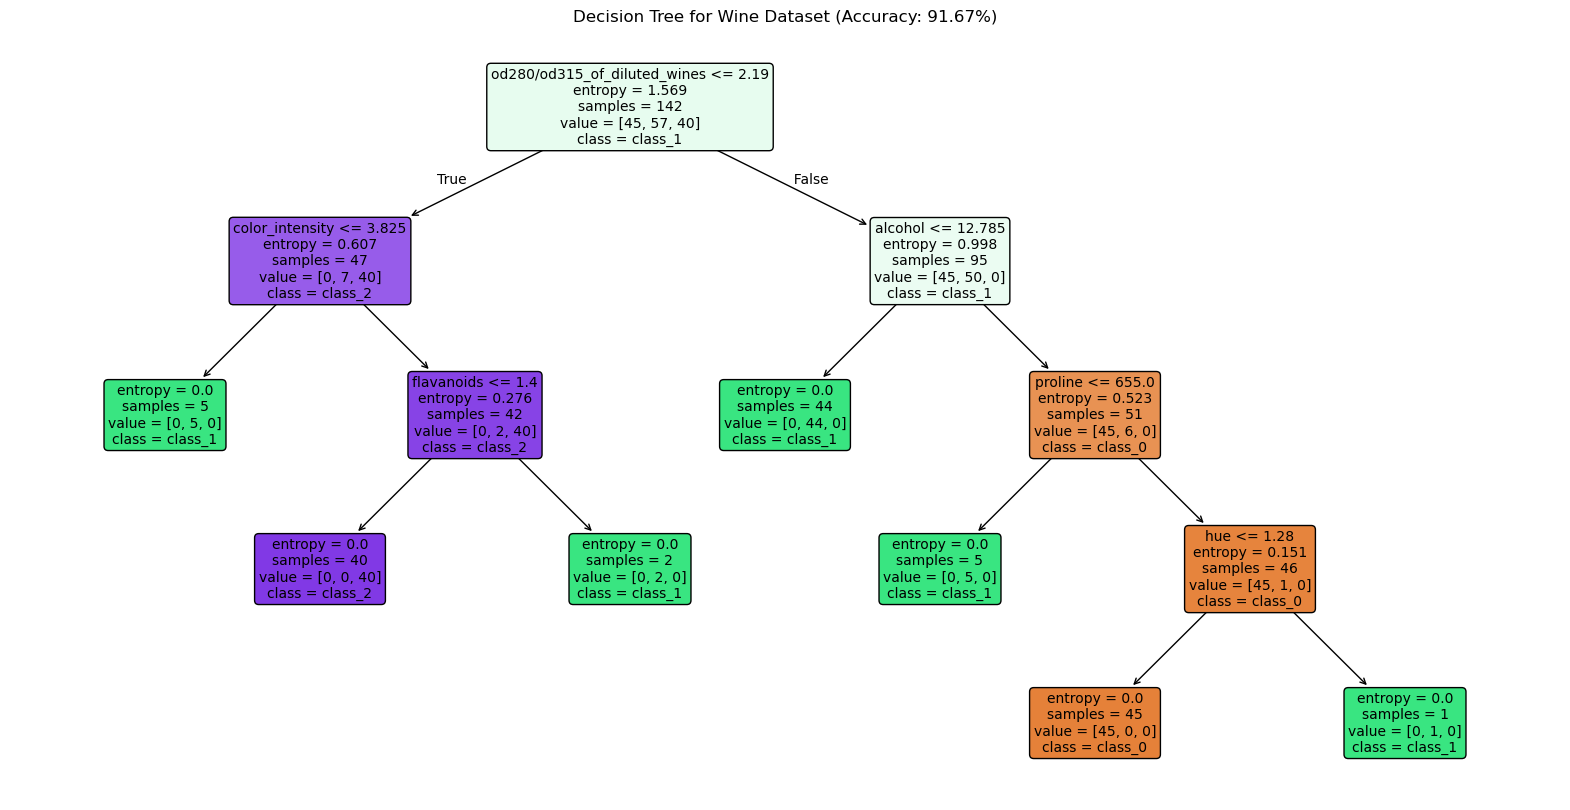

In [13]:
plt.figure(figsize=(20, 10))
plot_tree(
    model,
    filled=True,
    feature_names=feature_names,
    class_names=class_names,
    rounded=True,
    fontsize=10
)
plt.title(f"Decision Tree for Wine Dataset (Accuracy: {accuracy*100:.2f}%)")
plt.show()

In [23]:
manual_input = np.array([[
    12.37,     # alcohol 11.03 to 14.83
    1.07,     # malic_acid 0.74 to 5.8
    2.10,     # ash 1.36 to 3.23
    18.5,     # alcalinity_of_ash 10.6 to 30.0
    88.0,    # magnesium 70.0 to 162.0
    3.52,      # total_phenols 0.98 to 3.88
    3.75,      # flavanoids 0.34 to 5.08
    0.24,      # nonflavanoid_phenols 0.13 to 0.66
    2.19,      # proanthocyanins 0.41 to 3.58
    4.9,      # color_intensity 1.28 to 4.0
    1.04,     # hue 0.48 to 1.71
    3.47,      # od280/od315_of_diluted_wines  1.27 to 4.0
    510.0     # proline 278.0 to 1680.0
]])

# Make Prediction
manual_pred = model.predict(manual_input)

print(f"Predicted Wine Class for Manual Input: {manual_pred[0]}")
print(f"Class Name: {class_names[manual_pred[0]]}")

Predicted Wine Class for Manual Input: 1
Class Name: class_1
